# Analysis

In [16]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import seaborn as sns

path_parent = os.path.dirname(os.getcwd())

# if os.getcwd()[-8:] != 'HEALTH-ECONS':
#     os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/Y4S2/HEALTH ECONS/group_project


## Dataset Information

In [3]:
df = pd.read_csv('cleaned_data/main_data_file.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97134 entries, 0 to 97133
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State Code                                             97134 non-null  object 
 1   FIPS County Code                                       97134 non-null  int64  
 2   County Name                                            97134 non-null  object 
 3   Metal Level                                            97134 non-null  object 
 4   Issuer Name                                            97134 non-null  object 
 5   Premium Adult Individual Age 21                        97134 non-null  float64
 6   Medical Deductible - Individual - Standard             97134 non-null  float64
 7   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 8   Covid-Dummy                                    

## Value Counts for State and County

In [9]:
print(df['State Code'].value_counts().head(10))

TX    15013
FL    10023
MI     7595
GA     7584
SC     6274
NC     6094
IL     4131
OK     3994
MO     3906
OH     3502
Name: State Code, dtype: int64


In [12]:
df['County Name'].value_counts().head(10)

Marion        776
Jackson       696
Washington    671
Jefferson     670
Lincoln       621
Clay          585
Union         580
Monroe        569
Calhoun       553
Lake          524
Name: County Name, dtype: int64

In [13]:
df['Covid-Dummy'].value_counts()

1    57002
0    40132
Name: Covid-Dummy, dtype: int64

## Plots for Monetary Data

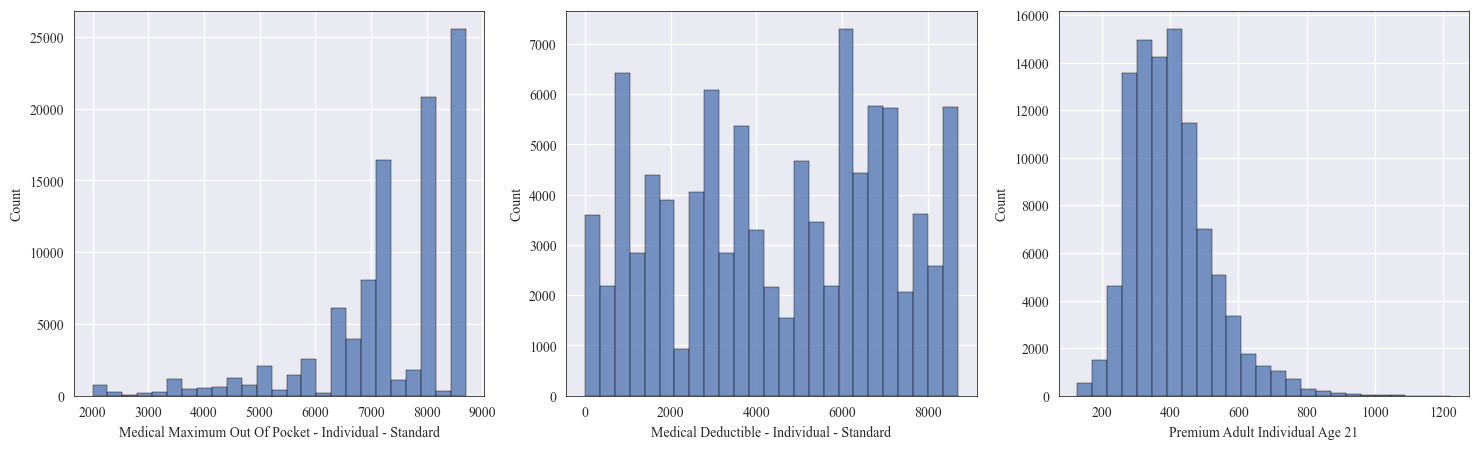

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.histplot(df['Medical Maximum Out Of Pocket - Individual - Standard'], bins = 25, ax=ax[0]);
sns.histplot(df['Medical Deductible - Individual - Standard'], bins = 25, ax=ax[1]);
sns.histplot(df['Premium Adult Individual Age 21'], bins = 25, ax=ax[2]);

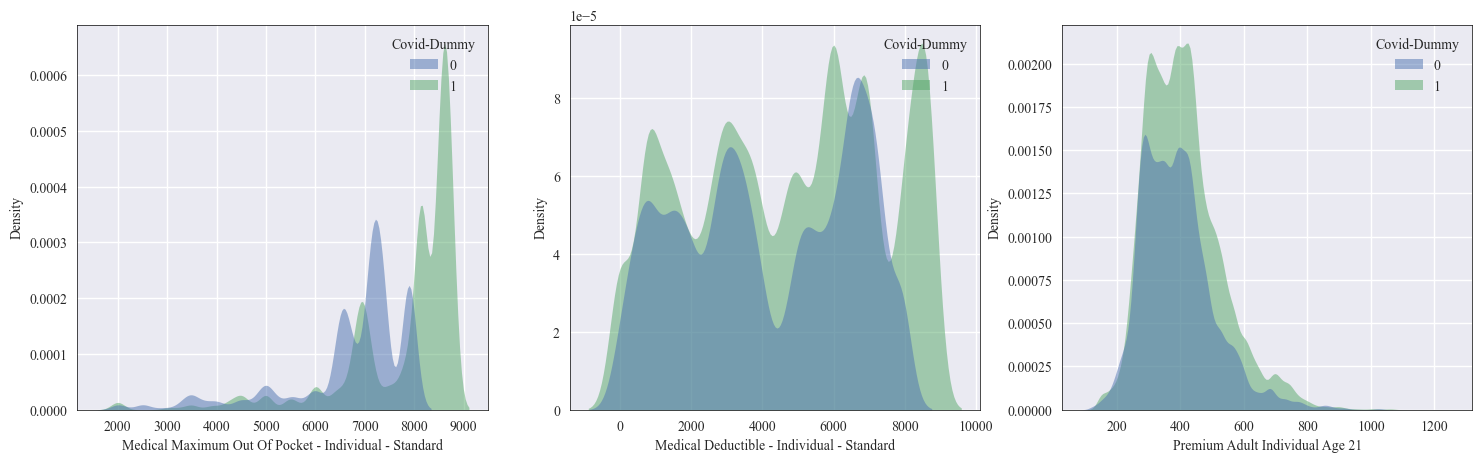

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.kdeplot(data = df, x = 'Medical Maximum Out Of Pocket - Individual - Standard', hue = 'Covid-Dummy', ax=ax[0], fill=True,
   alpha=.5, linewidth=0);
sns.kdeplot(data = df, x = 'Medical Deductible - Individual - Standard', hue = 'Covid-Dummy', ax=ax[1], fill=True,
   alpha=.5, linewidth=0);
sns.kdeplot(data = df, x = 'Premium Adult Individual Age 21', hue = 'Covid-Dummy', ax=ax[2], fill=True,
   alpha=.5, linewidth=0);

Model:

premium = max_oop + deductible + state_dummies + covid + state_dummies x covid + state_dummies x covid + covid_cases_in_state x state_dummies x covid + metal_level


In [30]:
df.columns

Index(['State Code', 'FIPS County Code', 'County Name', 'Metal Level',
       'Issuer Name', 'Premium Adult Individual Age 21',
       'Medical Deductible - Individual - Standard',
       'Medical Maximum Out Of Pocket - Individual - Standard', 'Covid-Dummy'],
      dtype='object')